In [2]:
import glob
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from pretrained_models.inceptionv3net import InceptionV3Net
# from pretrained_models.vgg16net import VGG16Net
# from pretrained_models.xceptionnet import XceptionNet
# from pretrained_models.resnet50net import ResNet50Net
from pypackage.classifier import Classifier
# from pypackage.preprocessor import Preprocessor
# from pypackage.feature_extractor import FeatureExtractor
import tensorflow as tf

2023-02-02 21:30:29.300746: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Load Fused Feature

In [21]:
train_ft = np.load("Extracted/fusedtrain.npy")

In [22]:
test_ft = np.load("Extracted/fusedtest.npy")

### Load Labels

In [21]:
y_train = np.load("Extracted/train_labels.npy")

In [21]:
test_labels = np.load("Extracted/test_labels.npy")

### K Nearest Neighbors classifier

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)

In [32]:
# Prediction from K Nearest Neighbors classifier
pred_KNN = Classifier.KNN(train_ft, test_ft, y_train)

# Inverse le transform to get original label back.
pred_KNN = le.inverse_transform(pred_KNN)
np.save("pred_KNN", pred_KNN)

# Print accuracy, precision, fscore

KNN_Accuracy = accuracy_score(test_labels, pred_KNN)
KNN_Precision = precision_score(test_labels, pred_KNN, average='weighted')
KNN_Fscore = f1_score(test_labels, pred_KNN, average='weighted')

print("KNN_Accuracy = ", KNN_Accuracy, "KNN_Precision = ", KNN_Precision, "KNN_Fscore = ", KNN_Fscore)

KNN_Accuracy =  0.9546147978642258 KNN_Precision =  0.9543988462802567 KNN_Fscore =  0.9542095933815046


In [33]:
print(classification_report(test_labels, pred_KNN))

              precision    recall  f1-score   support

      glioma       0.95      0.92      0.93      1200
  meningioma       0.93      0.90      0.91      1224
    no_tumor       0.98      0.99      0.99      1620
   pituitary       0.95      1.00      0.97      1200

    accuracy                           0.95      5244
   macro avg       0.95      0.95      0.95      5244
weighted avg       0.95      0.95      0.95      5244



[[1104   79    2   15]
 [  52 1096   25   51]
 [   6    3 1608    3]
 [   0    2    0 1198]]


<AxesSubplot:>

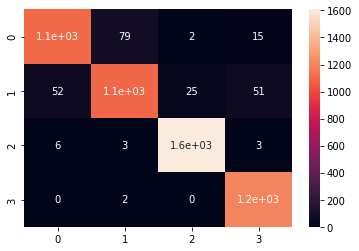

In [34]:
# Confusion Matrix - verify accuracy of each class

cm = confusion_matrix(test_labels, pred_KNN)
print(cm)
sns.heatmap(cm, annot=True)